In [61]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification,make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
import tensorflow.keras.backend as K 
from sklearn import linear_model
# import pandas as pd
import os 

In [17]:
""" We are setting global constants """
NUM_CLASSES =  2
NUM_SAMPLES =  1000
NUM_FEATURES =  20
EPOCHS =  30
BATCH_SIZE =  32

MODEL_PATH =  os.path.join(os.getcwd(),"models")

In [62]:
"""  We are making the model workhorse here"""

#Step 1, define a basic dataset aka fake one 

# X,y =  make_classification(n_samples=NUM_SAMPLES,n_features = NUM_FEATURES,n_classes=NUM_CLASSES,random_state=np.random.seed(1992))

X,y = make_regression(n_samples=NUM_SAMPLES,n_features = NUM_FEATURES,random_state=np.random.seed(1992))

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1,random_state=np.random.seed(1992))

input_shape =  (NUM_FEATURES,)

# Step2, load model

In [19]:
X.shape

(1000, 20)

In [63]:
model =  linear_model.LinearRegression()

In [64]:
model.fit(X_train,Y_train)

LinearRegression()

In [27]:
beta = model.coef_

In [65]:
y_hat = model.predict(X_test)

In [67]:
model.score(X_test,Y_test)

1.0

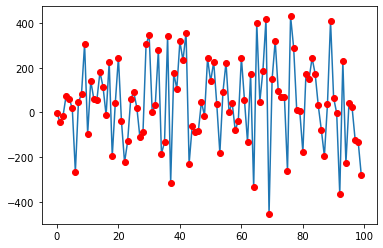

In [49]:
plt.plot(Y_test)
plt.plot(y_hat,'ro')

(20,)

# Working with ensemble classifier

In [68]:

X,y =  make_classification(n_samples=NUM_SAMPLES,n_features = NUM_FEATURES,n_classes=NUM_CLASSES,random_state=np.random.seed(1992))


In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1,random_state=np.random.seed(1992))

In [70]:
model = RandomForestClassifier(n_estimators=100,verbose=1)

In [71]:
model.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(verbose=1)

In [72]:
y_hat =  model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [73]:
model.score(X_test,Y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.91

In [74]:
cf_mat = confusion_matrix(Y_test,y_hat)

In [75]:
cf_mat

array([[43,  6],
       [ 3, 48]])

In [112]:
pca =  PCA(n_components=10,whiten=True)
x = pca.fit(X).transform(X)

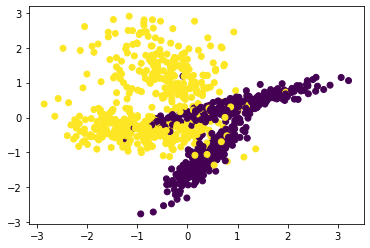

In [113]:
plt.scatter(x[:,0],x[:,1], c=list(y))
plt.show()

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=np.random.seed(1992))

In [82]:
model = RandomForestClassifier(n_estimators=100,verbose=1)

model.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(verbose=1)

In [83]:
model.score(X_test,Y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.94

In [84]:
y_hat =  model.predict(X_test)

cf_mat = confusion_matrix(Y_test,y_hat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [85]:
cf_mat

array([[45,  4],
       [ 2, 49]])

In [110]:
svd =  TruncatedSVD(n_components=10)
x = svd.fit(X).transform(X)

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=np.random.seed(1992))

In [96]:
model = RandomForestClassifier(n_estimators=100,verbose=1)

model.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(verbose=1)

In [97]:
model.score(X_test,Y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.91

In [98]:
y_hat =  model.predict(X_test)

cf_mat = confusion_matrix(Y_test,y_hat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [99]:
cf_mat

array([[44,  5],
       [ 4, 47]])

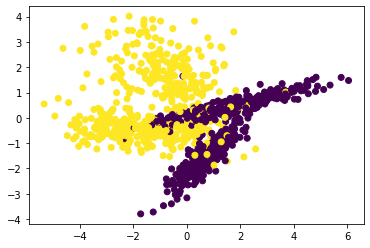

In [111]:

plt.scatter(x[:,0],x[:,1], c=list(y))
plt.show()